# Problem Statement

Based on the given loan data can we understand the major factors or characteristics of a borrower which makes them to get into delinquent stage.

• Delinquency is a major metric in assessing risk as more and more customers getting delinquent means the risk of customers that will default will also increase.

• The main objective is to minimize the risk for which you need to build a decision tree model using CART technique that will identify various risk and non-risk attributes of borrower’s to get into delinquent stage

# Importing libraries and Loading data

In [1]:
#!pip install pyforest

import pyforest

import warnings
warnings.filterwarnings('ignore')

In [2]:
ld_df = pd.read_csv("deliquent.csv")

<IPython.core.display.Javascript object>

# Checking the data

In [3]:
ld_df.head()

,ID,delinquent,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,Yes,1,36 months,Female,House,Mortgage,>25,300-500
1,2,No,0,36 months,Female,House,Rent,20-25,>500
2,3,Yes,1,36 months,Female,House,Rent,>25,300-500
3,4,Yes,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,Yes,1,36 months,Female,House,Rent,>25,300-500


### Dropping unwanted variables

Sdelinquent can also be dropped instead of delinquent.

In [4]:
ld_df=ld_df.drop(["ID","delinquent"],axis=1) 

In [5]:
ld_df.head()

,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,36 months,Female,House,Mortgage,>25,300-500
1,0,36 months,Female,House,Rent,20-25,>500
2,1,36 months,Female,House,Rent,>25,300-500
3,1,36 months,Female,Car,Mortgage,>25,300-500
4,1,36 months,Female,House,Rent,>25,300-500


In [6]:
ld_df.shape

(11548, 7)

In [7]:
ld_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sdelinquent     11548 non-null  int64 
 1   term            11548 non-null  object
 2   gender          11548 non-null  object
 3   purpose         11548 non-null  object
 4   home_ownership  11548 non-null  object
 5   age             11548 non-null  object
 6   FICO            11548 non-null  object
dtypes: int64(1), object(6)
memory usage: 631.7+ KB


many columns are of type object i.e. strings. These need to be converted to ordinal type

### Geting unique counts of all Objects

In [8]:
print('term \n',ld_df.term.value_counts())
print('\n')
print('gender \n',ld_df.gender.value_counts())
print('\n')
print('purpose \n',ld_df.purpose.value_counts())
print('\n')
print('home_ownership \n',ld_df.home_ownership.value_counts())
print('\n')
print('age \n',ld_df.age.value_counts())
print('\n')
print('FICO \n',ld_df.FICO.value_counts())

term 
 36 months    10589
60 months      959
Name: term, dtype: int64


gender 
 Male      6555
Female    4993
Name: gender, dtype: int64


purpose 
 House       6892
Car         2080
Other        928
Personal     892
Wedding      408
Medical      266
other         82
Name: purpose, dtype: int64


home_ownership 
 Mortgage    5461
Rent        5216
Own          871
Name: home_ownership, dtype: int64


age 
 20-25    5888
>25      5660
Name: age, dtype: int64


FICO 
 300-500    6370
>500       5178
Name: FICO, dtype: int64


In [9]:
ld_df['purpose'] = ld_df['purpose'].replace("other", "Other")

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

<Axes: xlabel='FICO', ylabel='count'>

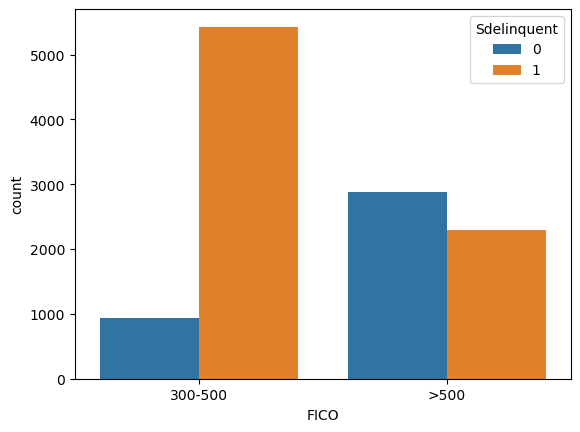

In [11]:
sns.countplot(x=ld_df['FICO'], hue=ld_df['Sdelinquent'])

<IPython.core.display.Javascript object>

<Axes: xlabel='FICO'>

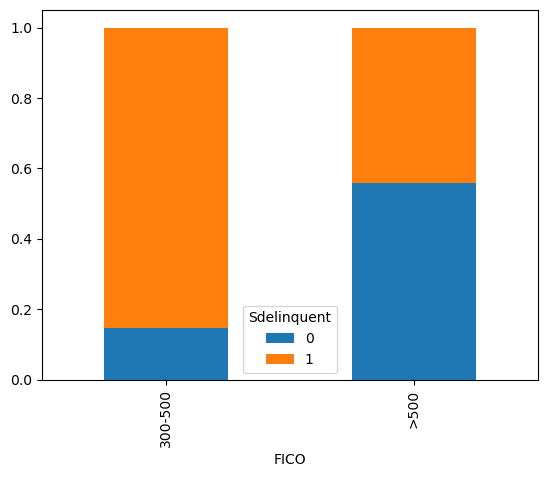

In [12]:
pd.crosstab(ld_df['FICO'], ld_df['Sdelinquent'], normalize='index').plot(kind='bar', stacked=True)

<IPython.core.display.Javascript object>

<Axes: xlabel='term'>

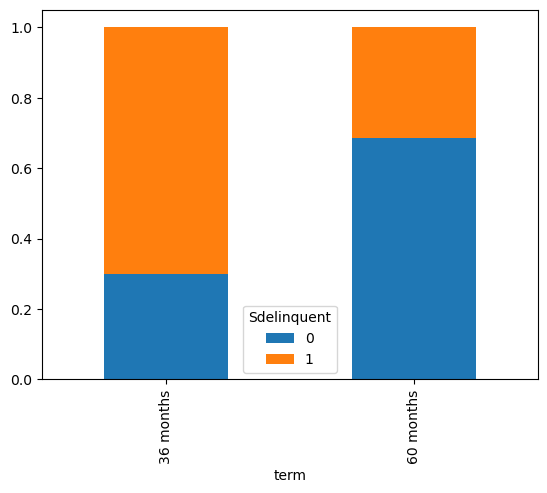

In [13]:
pd.crosstab(ld_df['term'], ld_df['Sdelinquent'], normalize='index').plot(kind='bar', stacked=True)

In [14]:
pd.crosstab(ld_df['FICO'], ld_df['term'],values=ld_df['Sdelinquent'], aggfunc=np.mean)

<IPython.core.display.Javascript object>

term,36 months,60 months
FICO,,
300-500,0.900481,0.000000
>500,0.436842,0.485437


<IPython.core.display.Javascript object>

<Axes: xlabel='age'>

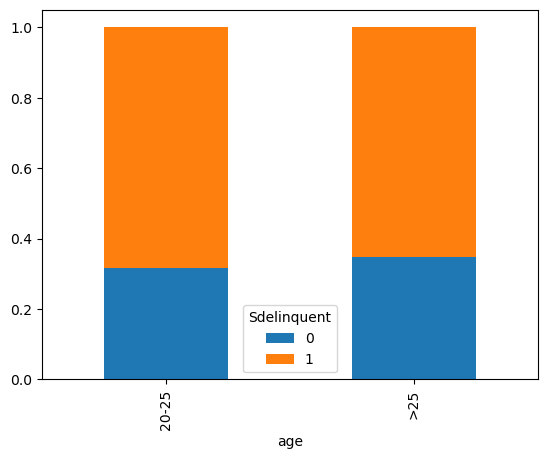

In [15]:
pd.crosstab(ld_df['age'], ld_df['Sdelinquent'], normalize='index').plot(kind='bar', stacked=True)#not imp-noise

<IPython.core.display.Javascript object>

<Axes: xlabel='purpose'>

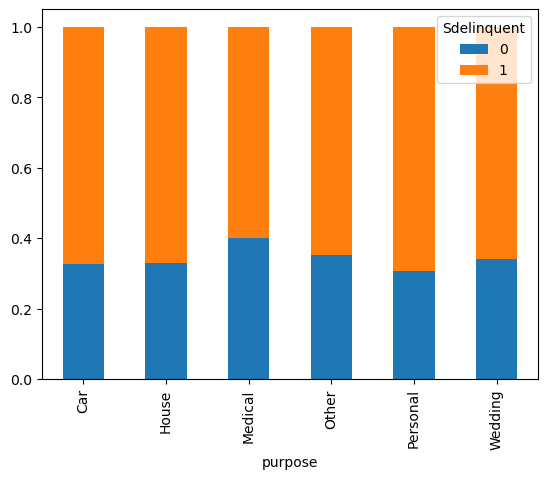

In [16]:
pd.crosstab(ld_df['purpose'], ld_df['Sdelinquent'], normalize='index').plot(kind='bar', stacked=True)

<IPython.core.display.Javascript object>

<Axes: xlabel='home_ownership'>

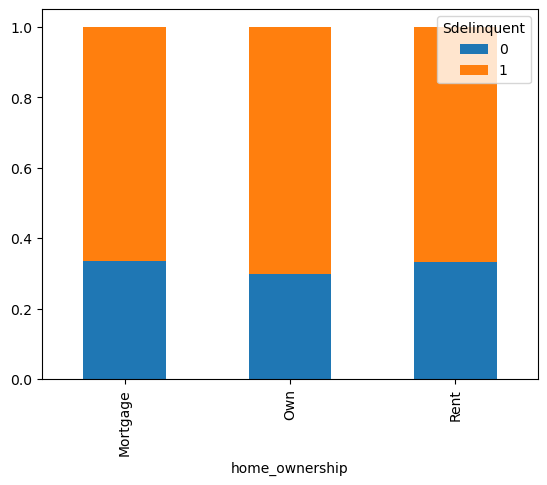

In [17]:
pd.crosstab(ld_df['home_ownership'], ld_df['Sdelinquent'], normalize='index').plot(kind='bar', stacked=True)

<IPython.core.display.Javascript object>

<Axes: xlabel='gender'>

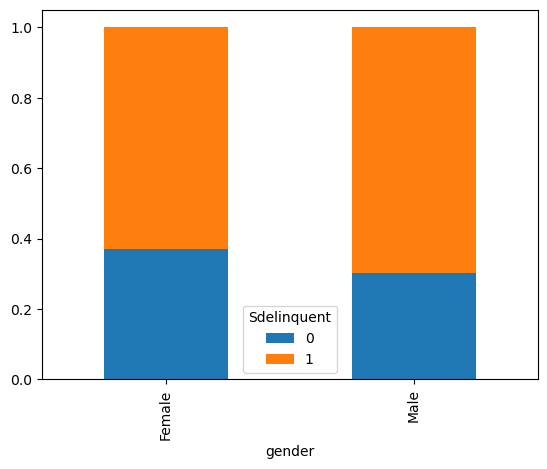

In [18]:
pd.crosstab(ld_df['gender'], ld_df['Sdelinquent'], normalize='index').plot(kind='bar', stacked=True)

<Axes: xlabel='Sdelinquent', ylabel='count'>

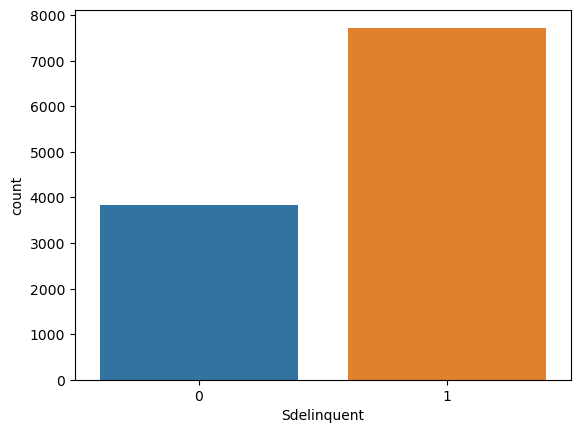

In [19]:
sns.countplot(x=ld_df['Sdelinquent']) 

In [20]:
ld_df['Sdelinquent'].value_counts() 

1    7721
0    3827
Name: Sdelinquent, dtype: int64

<Axes: ylabel='Sdelinquent'>

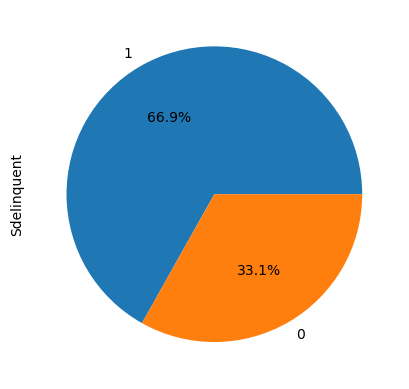

In [21]:
ld_df['Sdelinquent'].value_counts().plot(kind='pie', autopct='%1.1f%%')#data balance

### Note:
Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. 

The following code loops through each column and checks if the column type is object then converts those columns into categorical with each distinct value becoming a category.

In [22]:
for feature in ld_df.columns: 
    if ld_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ld_df[feature].unique()))
        print(pd.Categorical(ld_df[feature].unique()).codes)
        ld_df[feature] = pd.Categorical(ld_df[feature]).codes



feature: term


<IPython.core.display.Javascript object>

['36 months', '60 months']
Categories (2, object): ['36 months', '60 months']


<IPython.core.display.Javascript object>

[0 1]


<IPython.core.display.Javascript object>



feature: gender


<IPython.core.display.Javascript object>

['Female', 'Male']
Categories (2, object): ['Female', 'Male']


<IPython.core.display.Javascript object>

[0 1]


<IPython.core.display.Javascript object>



feature: purpose


<IPython.core.display.Javascript object>

['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical']
Categories (6, object): ['Car', 'House', 'Medical', 'Other', 'Personal', 'Wedding']


<IPython.core.display.Javascript object>

[1 0 3 4 5 2]


<IPython.core.display.Javascript object>



feature: home_ownership


<IPython.core.display.Javascript object>

['Mortgage', 'Rent', 'Own']
Categories (3, object): ['Mortgage', 'Own', 'Rent']


<IPython.core.display.Javascript object>

[0 2 1]


<IPython.core.display.Javascript object>



feature: age


<IPython.core.display.Javascript object>

['>25', '20-25']
Categories (2, object): ['20-25', '>25']


<IPython.core.display.Javascript object>

[1 0]


<IPython.core.display.Javascript object>



feature: FICO


<IPython.core.display.Javascript object>

['300-500', '>500']
Categories (2, object): ['300-500', '>500']


<IPython.core.display.Javascript object>

[0 1]


<IPython.core.display.Javascript object>

In [23]:
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sdelinquent     11548 non-null  int64
 1   term            11548 non-null  int8 
 2   gender          11548 non-null  int8 
 3   purpose         11548 non-null  int8 
 4   home_ownership  11548 non-null  int8 
 5   age             11548 non-null  int8 
 6   FICO            11548 non-null  int8 
dtypes: int64(1), int8(6)
memory usage: 158.0 KB


<Axes: >

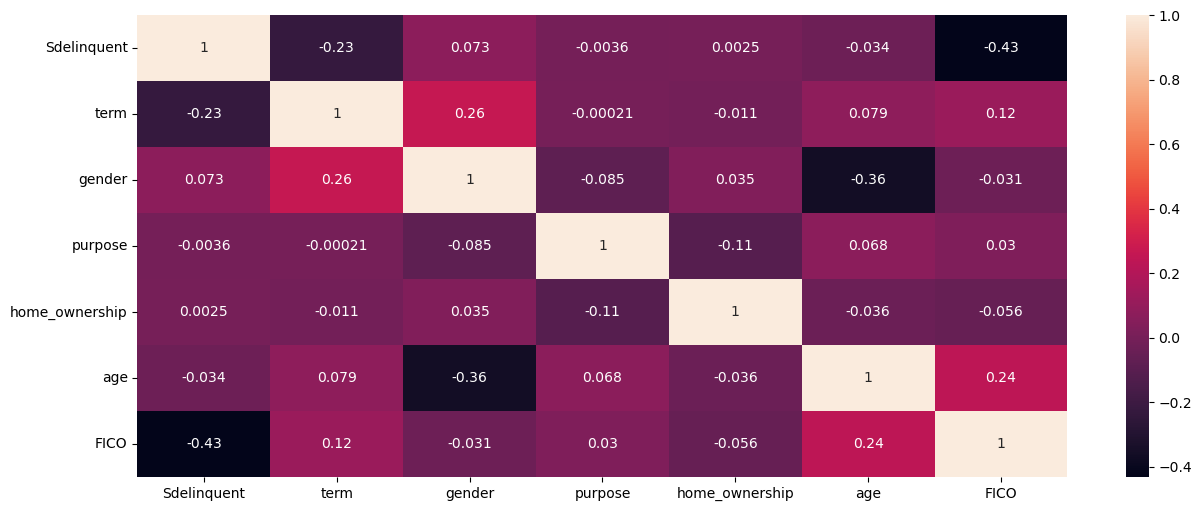

In [24]:
plt.figure(figsize=(15,6))
sns.heatmap(ld_df.corr(), annot=True) 

For each feature, look at the 2nd and 4th row to get the encoding mappings. Do not look at the line starting with 'Categories'

### Proportion of 1s and 0s

In [25]:
ld_df.Sdelinquent.value_counts(normalize=True) 

1    0.668601
0    0.331399
Name: Sdelinquent, dtype: float64

In [26]:
ld_df.Sdelinquent.value_counts(normalize=False)

1    7721
0    3827
Name: Sdelinquent, dtype: int64

In [27]:
ld_df[ld_df['Sdelinquent'] == 1].sample(3827)

,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
7625,1,0,0,0,0,1,0
2302,1,1,1,1,2,0,1
4954,1,0,1,0,0,0,0
2017,1,0,0,3,0,1,0
8314,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...
4617,1,0,1,5,2,0,0
7486,1,0,1,3,1,0,0
6643,1,0,1,1,2,1,1
7825,1,0,1,1,2,0,0


In [28]:
# Data Balance : 90:10
# If we increase minority - Oversampling (SMOTE)
# If we reduce majority - Undersampling

In [29]:
ld_df.head()

,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,0,0,1,0,1,0
1,0,0,0,1,2,0,1
2,1,0,0,1,2,1,0
3,1,0,0,0,0,1,0
4,1,0,0,1,2,1,0


In [30]:
ld_df.drop(['home_ownership', 'purpose','age'], axis=1, inplace=True)#bef this try generating decision tree

In [31]:
dummies = pd.get_dummies(ld_df, drop_first=True)

<IPython.core.display.Javascript object>

In [32]:
dummies.head()

,Sdelinquent,term,gender,age,FICO
0,1,0,0,1,0
1,0,0,0,0,1
2,1,0,0,1,0
3,1,0,0,1,0
4,1,0,0,1,0


In [33]:
dummies = ld_df.copy()

### Extracting the target column into separate vectors for training set and test set

In [34]:
X = dummies.drop("Sdelinquent", axis=1)

y = dummies.pop("Sdelinquent")
#y = ld_df['Sdelinquent']

X.head()

,term,gender,age,FICO
0,0,0,1,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


### Splitting data into training and test set

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=42, stratify=y)#0->33% 1->67%  startify will make 1->33%

### Checking the dimensions of the training and test data

In [36]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs', dummies.shape)

X_train (8083, 4)
X_test (3465, 4)
train_labels (8083,)
test_labels (3465,)
Total Obs (11548, 4)


### Building a Decision Tree Classifier

In [37]:
# Initialise a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
dt_model = DecisionTreeClassifier() # hyperparameters

In [38]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [39]:
from sklearn import tree

train_char_label = ['0', '1']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()


The above code will save a .dot file in your working directory.  
WebGraphviz is Graphviz in the Browser.   
Copy paste the contents of the file into the link below to get the visualization     
http://webgraphviz.com/

### Variable Importance

In [40]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

<IPython.core.display.Javascript object>

             Imp
FICO    0.395421
term    0.385553
gender  0.169079
age     0.049947


### Predicting Test Data

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [1]:
y_predict=dt_model.predict()

NameError: name 'dt_model' is not defined

In [48]:
confusion_matrix(test_labels, y_predict) 

NameError: name 'y_predict' is not defined

In [49]:
train_predict = dt_model.predict(X_train)
print(classification_report(train_labels, train_predict))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      2679
           1       0.88      0.91      0.89      5404

    accuracy                           0.85      8083
   macro avg       0.84      0.83      0.83      8083
weighted avg       0.85      0.85      0.85      8083



In [50]:
#train_predict = dt_model.predict(X_train)
test_predict = dt_model.predict(X_test)
print(classification_report(test_labels, test_predict))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1148
           1       0.88      0.89      0.88      2317

    accuracy                           0.84      3465
   macro avg       0.83      0.82      0.82      3465
weighted avg       0.84      0.84      0.84      3465



In [51]:
test_prob = pd.DataFrame(dt_model.predict_proba(X_test))[1]
test_pred = np.where(test_prob > 0.797, 1, 0)
print(classification_report(test_labels, test_pred))

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1148
           1       0.88      0.89      0.88      2317

    accuracy                           0.84      3465
   macro avg       0.83      0.82      0.82      3465
weighted avg       0.84      0.84      0.84      3465



# Regularising the Decision Tree

### Adding Tuning Parameters

In [46]:
reg_dt_model = DecisionTreeClassifier(max_depth = 10, min_samples_split=50)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=10, min_samples_split=50)

### Generating New Tree

In [ ]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

### Variable Importance

In [ ]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

### Predicting on Training and Test dataset

In [ ]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [ ]:
print(classification_report(train_labels, ytrain_predict))

In [ ]:
print(classification_report(test_labels, ytest_predict))

# Model Evaluation

## Measuring AUC-ROC Curve

In [ ]:
import matplotlib.pyplot as plt

### AUC and ROC for the training data

In [ ]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
reg_dt_model.predict_proba(X_train)

In [ ]:
# Probability Threshold Optimization

### AUC and ROC for the test data

In [ ]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Confusion Matrix for the training data

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
confusion_matrix(train_labels, ytrain_predict)

In [ ]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

In [ ]:
print((1985+4742)/(1985+650+706+4742))

In [ ]:
print(classification_report(train_labels, ytrain_predict))

## Confusion Matrix for test data

In [ ]:
confusion_matrix(test_labels, ytest_predict)

In [ ]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

In [ ]:
print((922+1941)/(922+270+332+1941))

In [ ]:
print(classification_report(test_labels, ytest_predict))

# Conclusion

Accuracy on the Training Data: 83%  
Accuracy on the Test Data: 82%

AUC on the Training Data: 87.9%  
AUC on the Test: 88.1%

Accuracy, AUC, Precision and Recall for test data is almost inline with training data.  
This proves no overfitting or underfitting has happened, and overall the model is a good model for classification

FICO, term and gender (in same order of preference) are the most important variables in determining if a borrower will get into a delinquent stage 

                                               Happy Learning

In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='newton-cg', n_jobs=-1, max_iter=10000)

model.fit(X_train, train_labels)

LogisticRegression(max_iter=10000, n_jobs=-1, solver='newton-cg')

In [53]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [54]:
print(classification_report(train_labels, pred_train))
print(classification_report(test_labels, pred_test))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69      2679
           1       0.84      0.87      0.86      5404

    accuracy                           0.80      8083
   macro avg       0.78      0.77      0.77      8083
weighted avg       0.80      0.80      0.80      8083

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1148
           1       0.84      0.85      0.85      2317

    accuracy                           0.80      3465
   macro avg       0.77      0.77      0.77      3465
weighted avg       0.80      0.80      0.80      3465

